# Economist Intelligence Unit (EIU)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("EIU.csv").convert_dtypes()

### Rows and columns

In [4]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 7


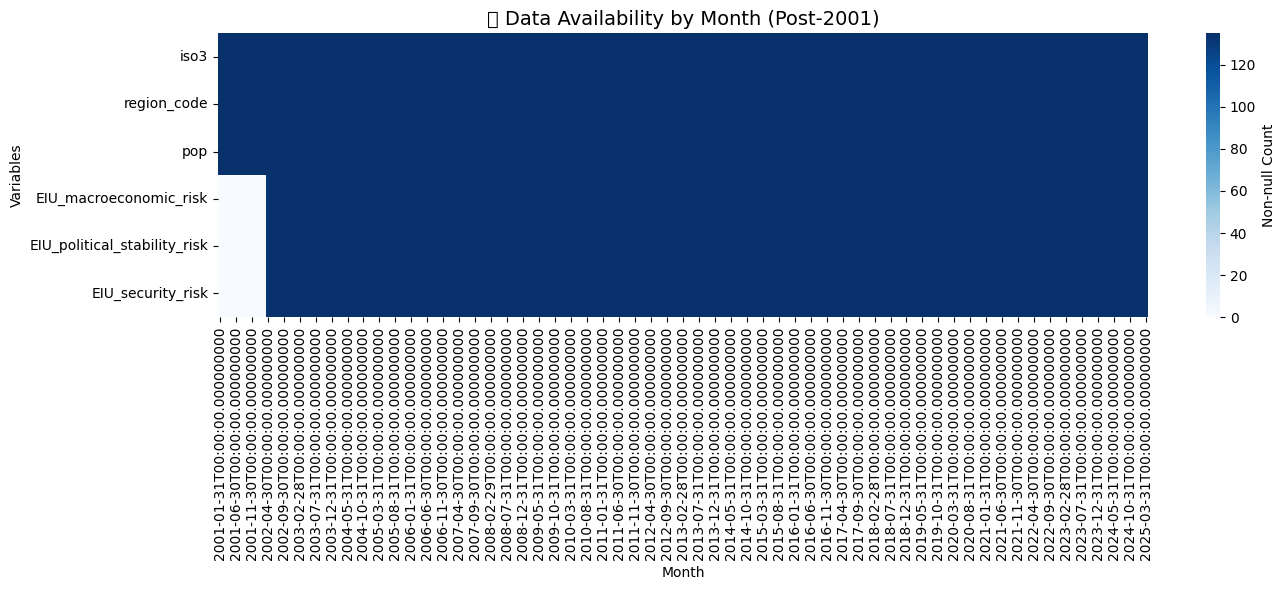

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2001-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


In [6]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,ECU,MLI,KGZ,KHM,ZWE
region_code,LAC,SSA,ECA,EAP,SSA
pop,17980083.0,23769127.0,7099750.0,17423880.0,16340822.0
EIU_macroeconomic_risk,30,30,35,15,75
EIU_political_stability_risk,60,85,60,55,65
EIU_security_risk,72,84,56,56,63


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39285 entries, 2001-01-01 to 2025-03-01
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   iso3                          39285 non-null  string 
 1   region_code                   39285 non-null  string 
 2   pop                           39285 non-null  Float64
 3   EIU_macroeconomic_risk        37257 non-null  Int64  
 4   EIU_political_stability_risk  37257 non-null  Int64  
 5   EIU_security_risk             37257 non-null  Int64  
dtypes: Float64(1), Int64(3), string(2)
memory usage: 2.2 MB


In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,39285,135,AFG,291
region_code,39285,6,SSA,13677


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,39285.0,44679014.820695,162463493.720016,9586.0,2312079.0,9509423.0,28516770.0,1438069596.0
EIU_macroeconomic_risk,37257.0,40.781866,19.392774,0.0,25.0,40.0,55.0,100.0
EIU_political_stability_risk,37257.0,53.798078,17.841824,0.0,45.0,55.0,65.0,100.0
EIU_security_risk,37257.0,44.989291,19.540213,0.0,32.0,43.0,57.0,100.0


### Details of missing values 

In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
EIU_political_stability_risk,2028,5.16
EIU_macroeconomic_risk,2028,5.16
EIU_security_risk,2028,5.16
iso3,0,0.00
region_code,0,0.00
pop,0,0.00


In [11]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 80].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [12]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Correlation Matrix

In [13]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

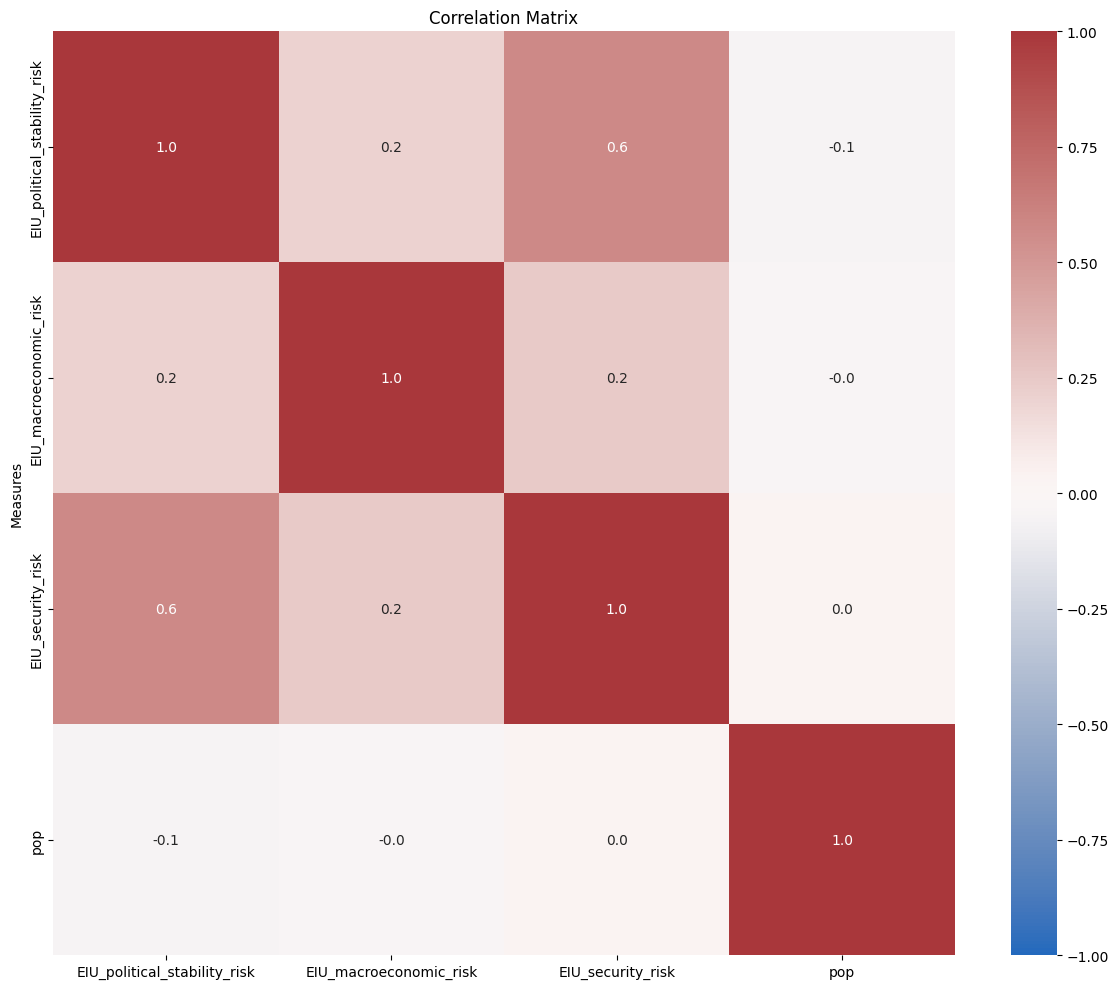

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()


### Prinicpal Components Analysis

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 3
Column names for PCA components: ['PC1', 'PC2', 'PC3']


In [16]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)
pca_correlation_matrix_df = pca_df.corr(method='pearson')

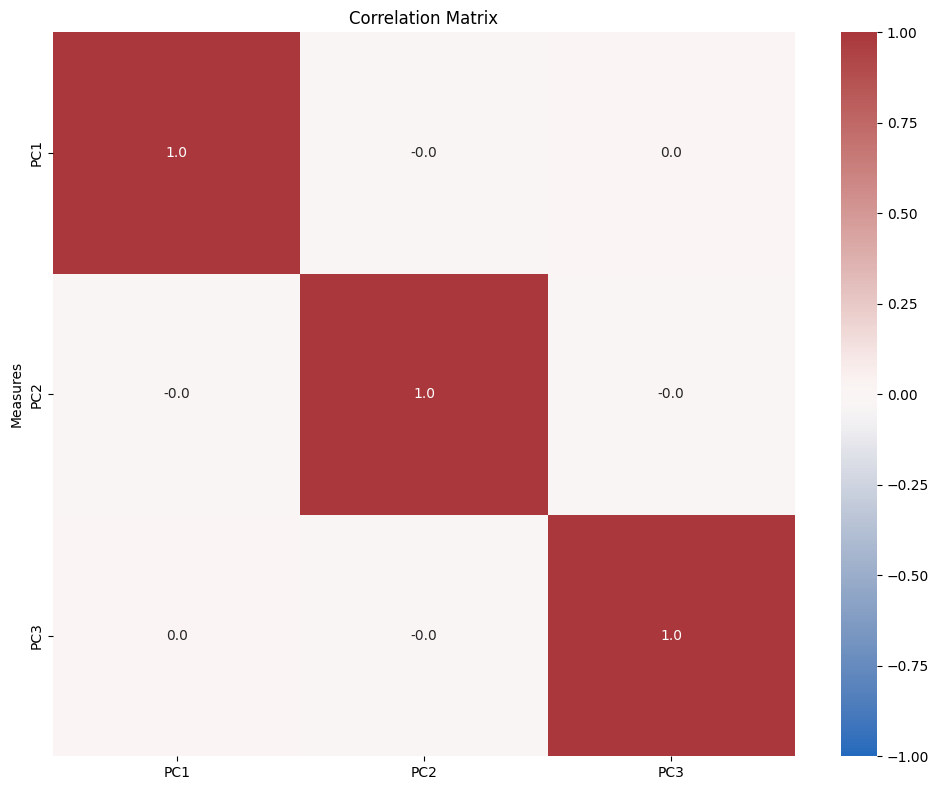

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance

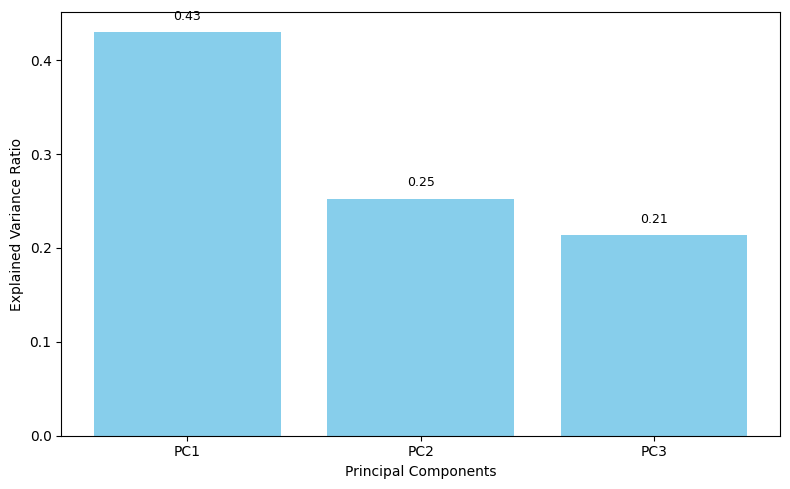

In [18]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Variance 

Cumulative explained variance at component 3: 0.8952


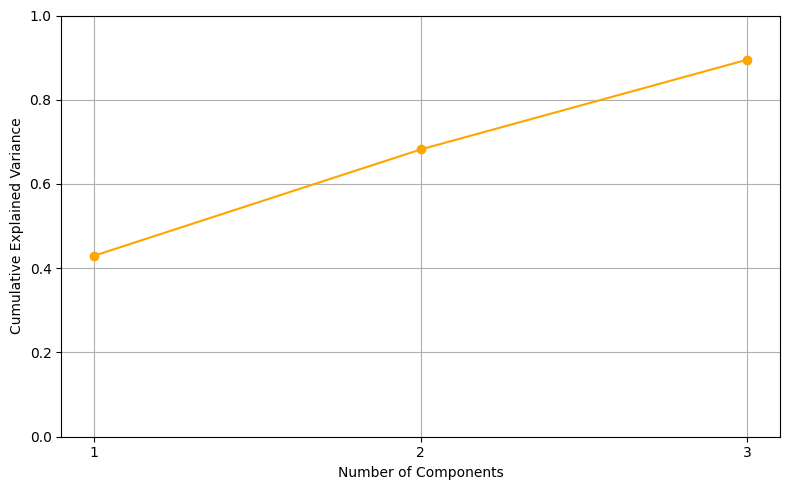

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 3 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

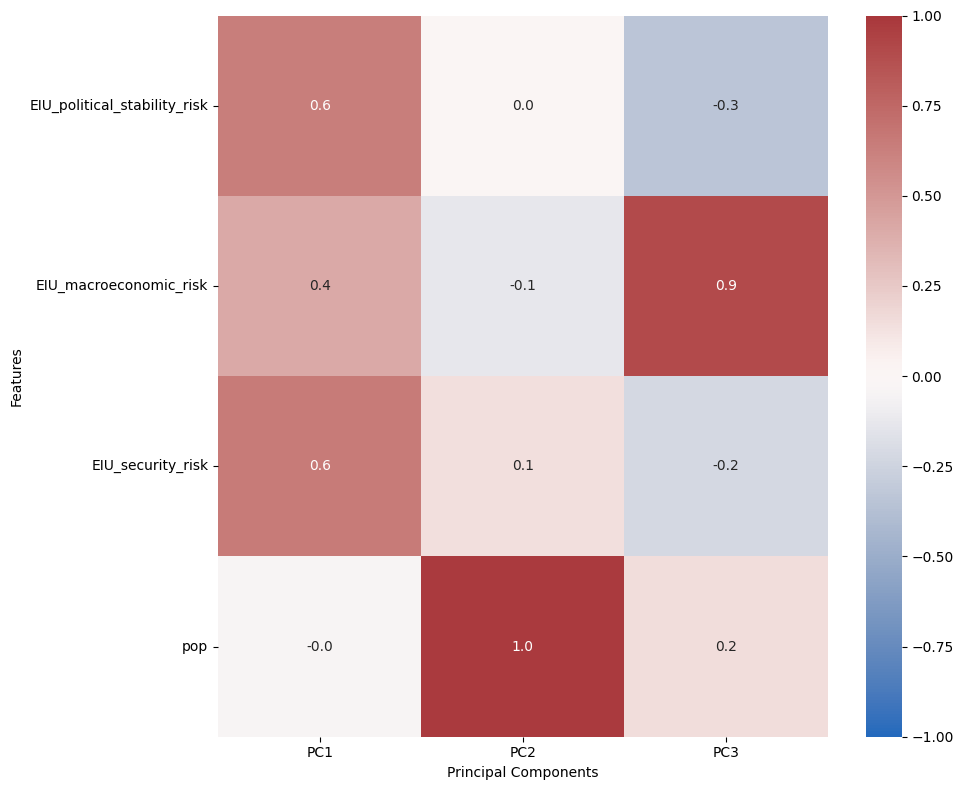

In [21]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [22]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                               PC1   PC2   PC3
EIU_political_stability_risk  0.64  0.01 -0.34
EIU_macroeconomic_risk        0.41 -0.13  0.90
EIU_security_risk             0.65  0.14 -0.22
pop                          -0.04  0.98  0.16


## Physical Interpretation

### PC1- Composite Risk Index . This component captures a generalized perception of country-level risk — especially political and security risks.

### PC2- Population

### PC3- Economic Risk Contrast, if a country has high macroeconomic risk, it might still have relatively stable politics/security, or vice versa.